## 📈 Customer Lifetime Value Prediction Using Regression


---
## 📝 Project Overview

This project aims to predict the **Customer Lifetime Value (CLV)** based on historical purchase data using regression modeling. This can help businesses identify high-value customers early on and make informed marketing decisions.

---

## 📦 Technologies Used
- Python 🐍
- Pandas
- Scikit-learn
- Matplotlib & Seaborn

---

## 📁 Step 1: Import Libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## 📥 Step 2: Load and Preview Dataset


In [17]:
df = pd.read_csv("history.csv")
df.head()


,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


## 🧾 Step 3: Dataset Summary


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  100 non-null    int64
 1   MONTH_1  100 non-null    int64
 2   MONTH_2  100 non-null    int64
 3   MONTH_3  100 non-null    int64
 4   MONTH_4  100 non-null    int64
 5   MONTH_5  100 non-null    int64
 6   MONTH_6  100 non-null    int64
 7   CLV      100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [24]:
df.describe()


,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,113.25000,115.750000,106.250000,106.750000,106.250000,108.500000,9421.190000
std,29.011492,55.32902,64.221739,63.601406,62.649317,59.816111,66.021499,2664.443174
min,1001.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4125.000000
25%,1025.750000,75.00000,75.000000,50.000000,50.000000,50.000000,50.000000,7816.000000
50%,1050.500000,100.00000,125.000000,100.000000,100.000000,100.000000,100.000000,9344.000000
75%,1075.250000,150.00000,175.000000,175.000000,150.000000,156.250000,175.000000,10719.250000
max,1100.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,17100.000000


## 🧹 Step 4: Data Cleaning
- Drop non-informative columns
- Check for missing values


In [27]:
# Drop customer ID if present
if 'CUST_ID' in df.columns:
    df.drop(columns=['CUST_ID'], inplace=True)

# Check for missing values
df.isnull().sum()


MONTH_1    0
MONTH_2    0
MONTH_3    0
MONTH_4    0
MONTH_5    0
MONTH_6    0
CLV        0
dtype: int64

## 📊 Step 5: Exploratory Data Analysis (EDA)


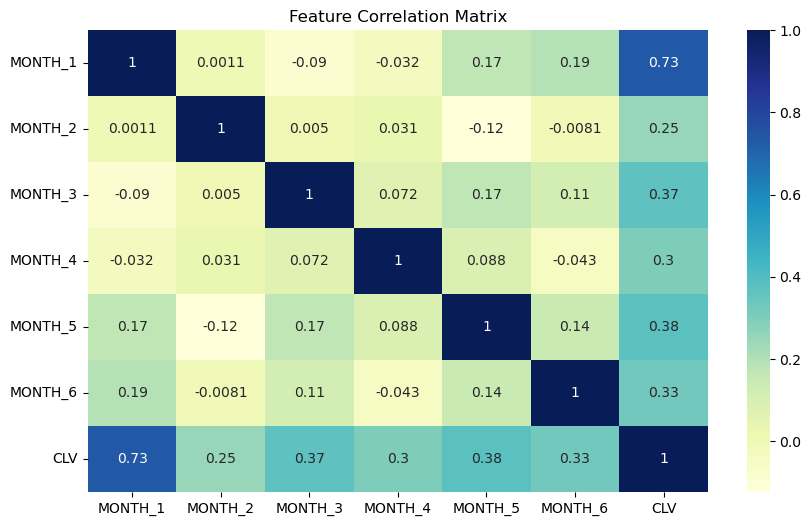

In [30]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Matrix")
plt.show()


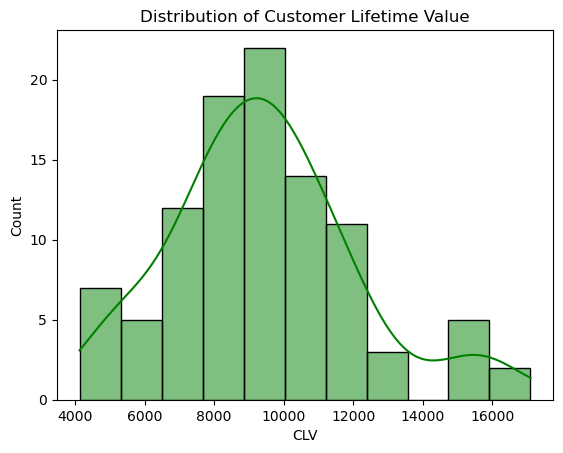

In [32]:
# Distribution of Target Variable (CLV)
sns.histplot(df['CLV'], kde=True, color='green')
plt.title("Distribution of Customer Lifetime Value")
plt.show()


## 🧠 Step 6: Feature and Target Selection


In [35]:
X = df.drop(columns=['CLV'])
y = df['CLV']


## ✂️ Step 7: Train-Test Split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 🤖 Step 8: Train Linear Regression Model


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 📈 Step 9: Model Evaluation


In [44]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score: ", round(r2, 3))
print("MAE     : ", round(mae, 2))
print("RMSE    : ", round(rmse, 2))


R² Score:  0.883
MAE     :  905.29
RMSE    :  1050.7


## 📉 Step 10: Visualize Actual vs Predicted CLV


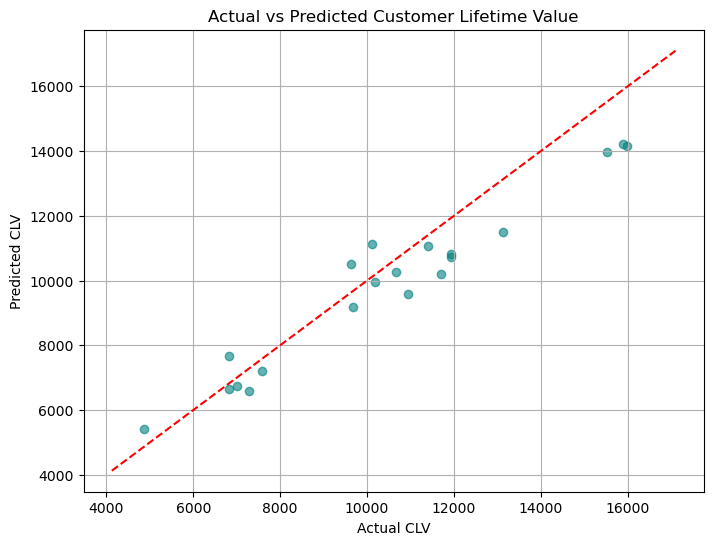

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.grid(True)
plt.show()


## ✅ Conclusion

- The model provides a regression-based estimate of each customer's future value.
- This can guide targeted marketing or loyalty programs.
- Metrics like R² and RMSE show how well the model fits the data.
